<a href="https://colab.research.google.com/github/abbazs333/ML_dev_training/blob/main/end_to_end_bulldozer_price_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting sale prices of bulldozers using machine learning

##1. Problem definition

how well can we predict the price of a bulldozer using prices and characteristics of previous bulldozers

##2. Data

the data is downloaded from the kaggle bluebook for bulldozers competition ([Kaggle Bluebook for Bulldozers](https://www.kaggle.com/competitions/bluebook-for-bulldozers/overview))

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.

* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

#3. Evaluation

the evaluation metric for this model will RMSLE (root mean squared log error) between the actual and the predicted prices 

Note : the goal is to minimize RMSLE value

##4. Features

kaggle provides a data dictionary on the features of the data set. you find the dataset over here : https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("TrainAndValid.csv")
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121.0,3.0,2004.0,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121.0,3.0,1996.0,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121.0,3.0,2001.0,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121.0,3.0,2001.0,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121.0,3.0,2007.0,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10648 entries, 0 to 10647
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   10648 non-null  int64  
 1   SalePrice                 10648 non-null  int64  
 2   MachineID                 10648 non-null  int64  
 3   ModelID                   10648 non-null  int64  
 4   datasource                10647 non-null  float64
 5   auctioneerID              10647 non-null  float64
 6   YearMade                  10647 non-null  float64
 7   MachineHoursCurrentMeter  10647 non-null  float64
 8   UsageBand                 9298 non-null   object 
 9   saledate                  10647 non-null  object 
 10  fiModelDesc               10647 non-null  object 
 11  fiBaseModel               10647 non-null  object 
 12  fiSecondaryDesc           6942 non-null   object 
 13  fiModelSeries             1461 non-null   object 
 14  fiMode

In [4]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      1
auctioneerID                    1
YearMade                        1
MachineHoursCurrentMeter        1
UsageBand                    1350
saledate                        1
fiModelDesc                     1
fiBaseModel                     1
fiSecondaryDesc              3706
fiModelSeries                9187
fiModelDescriptor            8063
ProductSize                  5743
fiProductClassDesc              1
state                           1
ProductGroup                    1
ProductGroupDesc                1
Drive_System                 8229
Enclosure                       7
Forks                        5250
Pad_Type                     8837
Ride_Control                 7101
Stick                        8837
Transmission                 6420
Turbocharged                 8837
Blade_Extension             10042
Blade_Width   

In [5]:
df_temp = pd.DataFrame({"saledate" : df["saledate"][0:1000],
                        "SalePrice" : df["SalePrice"][0:1000]})


[]

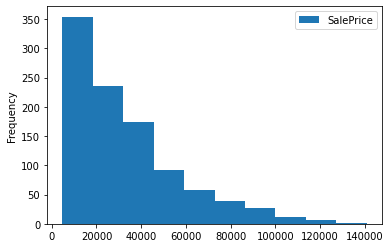

In [6]:
df_temp.plot.hist()

plt.plot()

In [7]:
df_temp[0:100]

,saledate,SalePrice
0,11/16/2006 0:00,66000
1,3/26/2004 0:00,57000
2,2/26/2004 0:00,10000
3,5/19/2011 0:00,38500
4,7/23/2009 0:00,11000
...,...,...
95,12/15/2005 0:00,25500
96,1/29/2004 0:00,17500
97,9/18/2008 0:00,64000
98,11/3/2005 0:00,20500


##Parsing date


In [8]:
df["saledate"]

0        11/16/2006 0:00
1         3/26/2004 0:00
2         2/26/2004 0:00
3         5/19/2011 0:00
4         7/23/2009 0:00
              ...       
10643    12/16/2004 0:00
10644     1/11/2005 0:00
10645    12/16/2004 0:00
10646     1/13/2005 0:00
10647                NaN
Name: saledate, Length: 10648, dtype: object

In [9]:
df = pd.read_csv("TrainAndValid.csv",
                 parse_dates = ["saledate"])

In [10]:
df["saledate"]

0       2006-11-16
1       2004-03-26
2       2004-02-26
3       2011-05-19
4       2009-07-23
           ...    
10643   2004-12-16
10644   2005-01-11
10645   2004-12-16
10646   2005-01-13
10647          NaT
Name: saledate, Length: 10648, dtype: datetime64[ns]

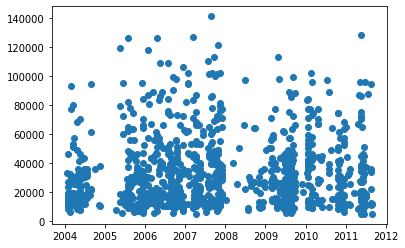

In [11]:
fig, ax = plt.subplots()
ax.scatter(x = df["saledate"][:1000], y= df["SalePrice"][:1000])

##Sorting my data is order by sales date

In [12]:
df = df.sort_values(by = ["saledate"])

In [13]:
df["saledate"][:20]

7648   2004-01-05
8228   2004-01-09
6770   2004-01-16
4051   2004-01-19
243    2004-01-20
5086   2004-01-20
4035   2004-01-27
4647   2004-01-29
8801   2004-01-29
2771   2004-01-29
6970   2004-01-29
9876   2004-01-29
8125   2004-01-29
8809   2004-01-29
2735   2004-01-29
7043   2004-01-29
7055   2004-01-29
5435   2004-01-29
2689   2004-01-29
9429   2004-01-29
Name: saledate, dtype: datetime64[ns]

In [14]:
df_og = df.copy()

##removing sale date and make the dates more understandable

In [15]:
df["sales_year"] = df["saledate"].dt.year
df["sales_day_of_month"] = df["saledate"].dt.day
df["sales_month"] = df["saledate"].dt.month
df["sales_day_of_week"] = df["saledate"].dt.dayofweek
df["sales_day_of_year"] = df["saledate"].dt.dayofyear


In [16]:
df[:20].T

,7648,8228,6770,4051,243,5086,4035,4647,8801,2771,6970,9876,8125,8809,2735,7043,7055,5435,2689,9429
SalesID,1165000,1166933,1162057,1152803,1140049,1156368,1152749,1154900,1168936,1148523,1162693,1172713,1166627,1168968,1148400,1162937,1162988,1157539,1148229,1171146
SalePrice,27000,10750,35000,30000,33000,19000,10000,33500,13000,44000,22500,19000,30000,23500,36000,18500,32000,36000,38000,37000
MachineID,733687,1035166,1060038,1000789,1055591,1060567,1005668,1057851,152517,1018259,429120,521850,5807,429610,185754,803028,1067661,1006595,1060565,313624
ModelID,7057,8861,4763,12263,1956,3822,4665,4147,7014,4806,3567,20090,3538,3567,3538,7040,22971,3538,3539,3539
datasource,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0
auctioneerID,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
YearMade,1995.0,2002.0,1999.0,1998.0,1995.0,1990.0,1989.0,1978.0,2001.0,1998.0,1997.0,2000.0,2001.0,1997.0,1999.0,2000.0,1993.0,2000.0,2001.0,2001.0
MachineHoursCurrentMeter,4368.0,603.0,479.0,4302.0,5468.0,0.0,6119.0,5768.0,1377.0,6988.0,12006.0,2226.0,1033.0,12492.0,2630.0,137.0,1034.0,1622.0,2012.0,1512.0
UsageBand,Medium,Low,Low,Medium,Medium,NaN,Low,Low,Medium,High,High,Medium,Medium,High,Medium,Low,Low,Medium,High,Medium
saledate,2004-01-05 00:00:00,2004-01-09 00:00:00,2004-01-16 00:00:00,2004-01-19 00:00:00,2004-01-20 00:00:00,2004-01-20 00:00:00,2004-01-27 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00,2004-01-29 00:00:00


In [17]:
df.drop("saledate", axis = 1, inplace=True)

#Turning non numerical data to numerical data


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10648 entries, 7648 to 10647
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   10648 non-null  int64  
 1   SalePrice                 10648 non-null  int64  
 2   MachineID                 10648 non-null  int64  
 3   ModelID                   10648 non-null  int64  
 4   datasource                10647 non-null  float64
 5   auctioneerID              10647 non-null  float64
 6   YearMade                  10647 non-null  float64
 7   MachineHoursCurrentMeter  10647 non-null  float64
 8   UsageBand                 9298 non-null   object 
 9   fiModelDesc               10647 non-null  object 
 10  fiBaseModel               10647 non-null  object 
 11  fiSecondaryDesc           6942 non-null   object 
 12  fiModelSeries             1461 non-null   object 
 13  fiModelDescriptor         2585 non-null   object 
 14  Pro

In [19]:
str_col_names = []
for name in list(df.columns.values):
  if pd.api.types.is_string_dtype(df[name]) == True:
    str_col_names.append(name)

In [20]:
len(str_col_names),len(df.columns.values)

(44, 57)

In [21]:
df_temp = df.copy()
for name in list(df_temp.columns.values):
  if pd.api.types.is_string_dtype(df_temp[name]) == True:
    df_temp[name] = df_temp[name].astype("category")

df = df_temp.copy()

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10648 entries, 7648 to 10647
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   10648 non-null  int64   
 1   SalePrice                 10648 non-null  int64   
 2   MachineID                 10648 non-null  int64   
 3   ModelID                   10648 non-null  int64   
 4   datasource                10647 non-null  float64 
 5   auctioneerID              10647 non-null  float64 
 6   YearMade                  10647 non-null  float64 
 7   MachineHoursCurrentMeter  10647 non-null  float64 
 8   UsageBand                 9298 non-null   category
 9   fiModelDesc               10647 non-null  category
 10  fiBaseModel               10647 non-null  category
 11  fiSecondaryDesc           6942 non-null   category
 12  fiModelSeries             1461 non-null   category
 13  fiModelDescriptor         2585 non-null   c

In [22]:
df.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [23]:
df.state.cat.codes

7648     31
8228      9
6770      0
4051     42
243      37
         ..
10025     0
10016     8
9996      0
10012    16
10647    -1
Length: 10648, dtype: int8

##Filling missing values

In [24]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      1
auctioneerID                    1
YearMade                        1
MachineHoursCurrentMeter        1
UsageBand                    1350
fiModelDesc                     1
fiBaseModel                     1
fiSecondaryDesc              3706
fiModelSeries                9187
fiModelDescriptor            8063
ProductSize                  5743
fiProductClassDesc              1
state                           1
ProductGroup                    1
ProductGroupDesc                1
Drive_System                 8229
Enclosure                       7
Forks                        5250
Pad_Type                     8837
Ride_Control                 7101
Stick                        8837
Transmission                 6420
Turbocharged                 8837
Blade_Extension             10042
Blade_Width                 10042
Enclosure_Type

In [25]:
temp_list = list(df.columns.values)
for name in temp_list:
  if pd.api.types.is_numeric_dtype(df[name]) == True:
    if pd.isnull(df[name]).sum():
      df[name + "_is_missing"] = df[name]
      df_temp[name] = df_temp[name].fillna(df[name].median())
      df[name] = df[name].fillna(df[name].median())
df.T   

,7648,8228,6770,4051,243,5086,4035,4647,8801,2771,...,10020,10021,10022,10023,10024,10025,10016,9996,10012,10647
SalesID,1165000,1166933,1162057,1152803,1140049,1156368,1152749,1154900,1168936,1148523,...,1173208,1173224,1173242,1173247,1173248,1173255,1173189,1173108,1173175,1174703
SalePrice,27000,10750,35000,30000,33000,19000,10000,33500,13000,44000,...,11000,55000,13000,11000,11500,8500,54000,38000,25000,72000
MachineID,733687,1035166,1060038,1000789,1055591,1060567,1005668,1057851,152517,1018259,...,1006898,1042053,1024580,1055519,1039720,1029427,1061881,21346,832574,558777
ModelID,7057,8861,4763,12263,1956,3822,4665,4147,7014,4806,...,9580,5889,9580,9580,9580,17235,5893,1580,3856,1623
datasource,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,...,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sales_year_is_missing,2004.0,2004.0,2004.0,2004.0,2004.0,2004.0,2004.0,2004.0,2004.0,2004.0,...,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,NaN
sales_day_of_month_is_missing,5.0,9.0,16.0,19.0,20.0,20.0,27.0,29.0,29.0,29.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN
sales_month_is_missing,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
sales_day_of_week_is_missing,0.0,4.0,4.0,0.0,1.0,1.0,1.0,3.0,3.0,3.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,4.0,NaN


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10648 entries, 7648 to 10647
Data columns (total 66 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   SalesID                              10648 non-null  int64   
 1   SalePrice                            10648 non-null  int64   
 2   MachineID                            10648 non-null  int64   
 3   ModelID                              10648 non-null  int64   
 4   datasource                           10648 non-null  float64 
 5   auctioneerID                         10648 non-null  float64 
 6   YearMade                             10648 non-null  float64 
 7   MachineHoursCurrentMeter             10648 non-null  float64 
 8   UsageBand                            9298 non-null   category
 9   fiModelDesc                          10647 non-null  category
 10  fiBaseModel                          10647 non-null  category
 11  fiSecondaryD

In [27]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
                                ..
sales_year_is_missing            1
sales_day_of_month_is_missing    1
sales_month_is_missing           1
sales_day_of_week_is_missing     1
sales_day_of_year_is_missing     1
Length: 66, dtype: int64

In [28]:
pd.Categorical(df["state"]).codes

array([31,  9,  0, ...,  0, 16, -1], dtype=int8)

In [29]:
for val in temp_list:
  if pd.api.types.is_categorical_dtype(df[val]) == True:
    if pd.isnull(df[val]).sum():
      df[val + "_is_missing"] = df[val]
      df[val] = pd.Categorical(df[val]).codes + 1
      df[val] = df[val].fillna(0)
      df_temp[val] = pd.Categorical(df[val]).codes + 1
      df_temp[val] = df[val].fillna(0)


In [30]:
df_temp.isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock                   0
Ripper    

##Lets build a machin elearnign model

In [32]:
len(df_temp),3

(10648, 3)